In [1]:
#import required libraries for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [6]:
df.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [7]:
mode = df['Treated_with_drugs'].mode()
mode

0    DX6
dtype: object

In [10]:
#replace missing values with mode(). since categorical variable
#fillna(df['Treated_with_drugs'].mode() returns a series object hence use .iloc[0] # ref: https://stackoverflow.com/questions/42789324/pandas-fillna-mode
df['Treated_with_drugs'].fillna(df['Treated_with_drugs'].mode()[0], inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

In [11]:
#fill missing values with media since rest all are numerical columns
df.fillna(df.median(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

In [12]:
#check for duplicates
df.duplicated().sum()

0

In [95]:
# This helps us in profiling the dataset
# Profiling helps you understand data better!
!pip install pandas-profiling
import pandas_profiling 

profile = pandas_profiling.ProfileReport(df)
profile.to_file("profile_report.html") #exporting to html file for a better view 

You should consider upgrading via the 'c:\users\csuftitan\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [13]:
df['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

In [14]:
df['Patient_mental_condition'].value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

In [15]:
df.drop('Patient_mental_condition', axis=1, inplace=True)

In [16]:
df.shape

(23097, 17)

In [17]:
df = pd.get_dummies(df)
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,1,0,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,1,0
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,0


# let's build a basline model Logistic regression

In [18]:
#considering all variables except "Dataset" as input variables 
X=df.drop(columns= ['Survived_1_year'])

y=df['Survived_1_year'] #target variable

In [19]:
#split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [20]:
#check
X_test.shape

(4620, 50)

In [21]:
#train the model - Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
#test the model on test data
y_pred = lr.predict(X_test)
#test the acccuracy of the model
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)
from sklearn.metrics import accuracy_score, f1_score

ac = accuracy_score(y_test, y_pred)
fscore = f1_score(y_test ,y_pred)

# View The Accuracy Of Our Full Feature (all Features) Model
print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", fscore)

Baseline Model Accuracy: 0.6562770562770562
Baseline Model F1 Score: 0.7309386648593696


c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_new = pd.get_dummies(test_new)


In [23]:
y_test_pred = lr.predict(test_new)

In [24]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_new = pd.get_dummies(test_new)

y_test_pred = lr.predict(test_new)
#writing prediction values to csv!
res = pd.DataFrame(y_test_pred)
#res.index = test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_LP1.csv")  

# Let's do some  feature selection

# 1. Let's try feature selection - Boruta

In [119]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [121]:

!pip install Boruta
from boruta import BorutaPy

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, max_depth=5, random_state=1)
 
forest.fit(X_train, y_train)

You should consider upgrading via the 'c:\users\csuftitan\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [122]:
# Apply The Full Featured Classifier To The Test Data
y_pred = forest.predict(X_test)
ac = accuracy_score(y_test, y_pred)
fscore = f1_score(y_test ,y_pred)

# View The Accuracy Of Our Full Feature (all Features) Model
print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", fscore)

Baseline Model Accuracy: 0.7584415584415585
Baseline Model F1 Score: 0.8318264014466545


### Applying Boruta use NumPy array for computational and other benefits

In [123]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	9
Rejected: 	26
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	9
Rejected: 	26
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	9
Rejected: 	26
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	9
Rejected: 	26
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	6
Rejected: 	28
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	6
Rejected: 	28
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	6
Rejected: 	28
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	6
Rejected: 	28
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	4
Reject

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=120, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x29114779E18,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto

In [124]:
# check selected features
print("Selected Features: ", boruta_selector.support_)
 
# check ranking of features
print("Ranking: ",boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False  True  True  True  True  True  True False  True False False False
  True  True False False False False False False False False False False
 False False False False  True False False False False False False False
 False  True False False False False False  True  True False  True  True
  True  True]
Ranking:  [ 6  1  1  1  1  1  1  2  1 14 18 22  1  1 15 27 33 34 30 26 32 23  8 25
 30 16 10 11  1  4 20 29 28 13 17 21  6  1 11 19  3  5  9  1  1 24  1  1
  1  1]
No. of significant features:  17


In [125]:

# Let's visualise it better in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
49,Patient_Rural_Urban_URBAN,1
37,Treated_with_drugs_DX3,1
43,Treated_with_drugs_DX5,1
13,Treated_with_drugs_DX1,1
12,Number_of_prev_cond,1
44,Treated_with_drugs_DX6,1
28,Treated_with_drugs_DX1 DX5,1
47,Patient_Smoker_YES,1
46,Patient_Smoker_NO,1
6,B,1


# Create a new subset of the data with only the selected features
## Let's create a dataset with only these 17 features now.

In [126]:
# transform train and  test sets with the selected 17 variables
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [146]:
#since correlation works on dataframe, converting X_important_train nparray to a dataframe 

X_imp_train_df = pd.DataFrame(X_important_train,index=X_important_train[:,0])


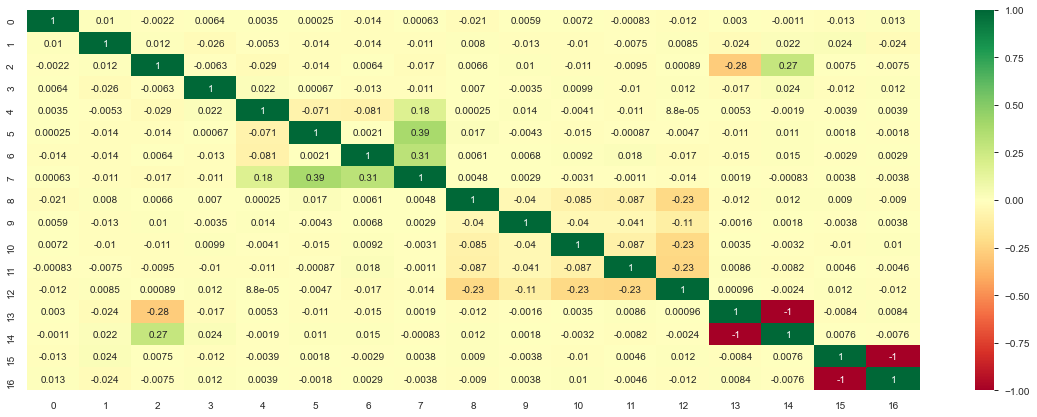

In [148]:
#draw a heatmap based on correlation values
fig, ax = plt.subplots(figsize=(20,7))   
sns.heatmap(X_imp_train_df.corr(), annot = True, cmap="RdYlGn") #Not necessary! Didn't create any value!!

In [127]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

## Comparison of model performance with and without feature selection

In [128]:
#Apply The Limited Featured Classifier To The Test Data
y_important_pred = rf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (17 Features) Model
rf_imp_ac = accuracy_score(y_test, y_important_pred)
rf_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Boruta Model Accuracy:", rf_imp_ac)
print("Limited Features Boruta Model F1 Score:", rf_imp_fscore)

Limited Features Boruta Model Accuracy: 0.8112554112554112
Limited Features Boruta Model F1 Score: 0.8532974427994616


In [130]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [132]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [133]:
test_new = pd.get_dummies(test_new)

In [134]:
X_test_new = boruta_selector.transform(np.array(test_new))

In [135]:
y_new_pred = rf_important.predict(X_test_new)

In [136]:
#writing prediction values to csv!
res = pd.DataFrame(y_new_pred)
#res.index = test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_LP.csv")  

# 2. Let's try with RFE feature selection

In [152]:

from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= lr , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    http

c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    http

Num Features: 25
Selected Features: [False False False False False  True  True  True  True  True  True  True
  True False False  True False False  True False False  True False  True
 False  True False  True  True False False False False  True False  True
  True False False  True  True False False  True  True  True False  True
  True False]
Feature Ranking: [26 22 25 24 14  1  1  1  1  1  1  1  1 16  4  1 18 17  1 10 20  1  3  1
 21  1 19  1  1  8 11  7 23  1  9  1  1 15 13  1  1  6  5  1  1  1  2  1
  1 12]


c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



### Representing feature ranks in the form of a table
#### Through the output mentioned above we can't understand which feature has a better rank unless we see the index of each. In order to better visualise, we can put it in the form of a table with ranking as mentioned below.

In [153]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
21,Treated_with_drugs_DX1 DX2 DX5,1
40,Treated_with_drugs_DX3 DX5,1
39,Treated_with_drugs_DX3 DX4 DX5,1
36,Treated_with_drugs_DX2 DX5,1
35,Treated_with_drugs_DX2 DX4 DX5,1
33,Treated_with_drugs_DX2 DX3 DX5,1
44,Treated_with_drugs_DX6,1
28,Treated_with_drugs_DX1 DX5,1
27,Treated_with_drugs_DX1 DX4 DX5,1
25,Treated_with_drugs_DX1 DX3 DX5,1


### Create a new subset of the data with only the selected features
#### <b> Now that we have obtained which features have the best score, we'll select only those features to fit the model.
#### <b> To select important features you need to apply transformation on the dataset. We use .transform() to transform our dataset with important selected features. Always remember that train and test data must be transformed separately, else there might be data leak that hampers the model training.

In [155]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
lr_rfe_model = lr.fit(X_train_rfe, y_train)

c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Comparison of model performance with and without feature selection¶


In [156]:
# making predictions and evaluating the model
y_pred_rfe = lr_rfe_model.predict(X_test_rfe)

rfe_ac = accuracy_score(y_test, y_pred_rfe)
rfe_fscore = f1_score(y_test ,y_pred_rfe)

print("RFE Model Accuracy:", rfe_ac)
print("RFE Model F1 Score:", rfe_fscore)

RFE Model Accuracy: 0.716017316017316
RFE Model F1 Score: 0.7932555940750078


# 3. Let's see feature importance using Random forest 

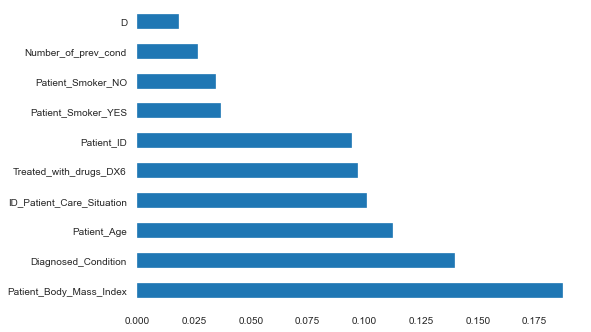

In [157]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the classifier
rf_clf.fit(X_train, y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [158]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# It will select the features based on the importance score
rf_sfm = SelectFromModel(rf_clf)

#Alternatively if you want to set a specific threshold and select the features you may the following code that is commented
# features that have an importance of more than 0.075 ( all top 4 features lie above this)
# rf_sfm = SelectFromModel(rf_clf, threshold=0.075)

# Train the selector
rf_sfm = rf_sfm.fit(X_train, y_train)


### Create a new subset of the data with only the selected features

In [159]:

# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = rf_sfm.transform(X_train)
X_important_test = rf_sfm.transform(X_test)

### Train a new Random Forest Classifier using selected important features

In [ ]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important = clf_important.fit(X_important_train, y_train)

### Comparison of model performance with and without feature selection

In [ ]:
y_pred = rf_clf.predict(X_test)
rf_ac = accuracy_score(y_test, y_pred)
rf_fscore = f1_score(y_test ,y_pred)

# View The Accuracy Of Our Full Feature (8 Features) Model
print("Baseline Model Accuracy:", rf_ac)
print("Baseline Model F1 Score:", rf_fscore)

In [ ]:

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (4 Features) Model
rf_imp_ac = accuracy_score(y_test, y_important_pred)
rf_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Model Accuracy:", rf_ac)
print("Limited Features Model F1 Score:", rf_fscore)

# Let's try logistic regression with the top ten features that we obtained from Random forest

In [ ]:
 'Patient_ID',        'Patient_Smoker_YES',

In [480]:
X1 = df[['D', 'Number_of_prev_cond', 'Patient_Smoker_NO', 'ID_Patient_Care_Situation', 'Treated_with_drugs_DX6','Patient_Age','Diagnosed_Condition','Patient_Body_Mass_Index']]
y1 = df['Survived_1_year'] 

In [220]:
lr2 = LogisticRegression()
lr2.fit(X1, y1)
#test the model on test data
y2_pred = lr2.predict(test_new1)

In [222]:

#writing prediction values to csv!
res = pd.DataFrame(y2_pred)
#res.index = test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_LP_Complete.csv") 0.015,18 = 83.09

In [511]:
#split dataset into train and test sets
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.1, random_state=10)

In [512]:
#train the model - Logistic regression
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X1_train, y1_train)
#test the model on test data
y1_pred = lr1.predict(X1_test)
#test the acccuracy of the model
import sklearn
sklearn.metrics.accuracy_score(y1_test,y1_pred)
from sklearn.metrics import accuracy_score, f1_score

ac1 = accuracy_score(y1_test, y1_pred)
fscore1 = f1_score(y1_test ,y1_pred)

# View The Accuracy Of Our Full Feature (all Features) Model
print("Baseline Model Accuracy:", ac1)
print("Baseline Model F1 Score:", fscore1)

Baseline Model Accuracy: 0.729004329004329
Baseline Model F1 Score: 0.8165298944900351


In [158]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_new = pd.get_dummies(test_new)

In [513]:
test_new1 = test_new[['D', 'Number_of_prev_cond', 'Patient_Smoker_NO', 'ID_Patient_Care_Situation', 'Treated_with_drugs_DX6','Patient_Age','Diagnosed_Condition','Patient_Body_Mass_Index']]

In [514]:
y1_test_pred = lr1.predict(test_new1)
#writing prediction values to csv!
res = pd.DataFrame(y1_test_pred)
#res.index = test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_LP10.csv") 